In [1]:
# Data Source: moodle

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

# Step 1: Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(7578806, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.347723e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.806111e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.132419e+01
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4.600000e+03
5,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
6,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.410000e+08
7,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.779008e+01
8,Arab World,ARB,Broad money (% of GDP),FM.LBL.BMNY.GD.ZS,1960,2.207371e+01
9,Arab World,ARB,Capture fisheries production (metric tons),ER.FSH.CAPT.MT,1960,4.748800e+05


Looks like it has different indicators for different countries with the year and value of the indicator. 

### How many UNIQUE country names are there ?

In [4]:
countries = data['CountryName'].unique().tolist()
print(type(countries))
len(countries)

<class 'list'>


263

### Are there same number of country codes ?

In [5]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

263

### Are there many indicators or few ?

In [5]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1437

### How many years of data do we have ?

In [7]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

61

### What's the range of years?

In [8]:
print(min(years)," to ",max(years))

1960  to  2020


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1 CO2 emissions \(metric</p><br>

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [9]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [10]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36242,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
78181,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
122451,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
166699,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
211426,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Let's see how emissions have changed over time using MatplotLib

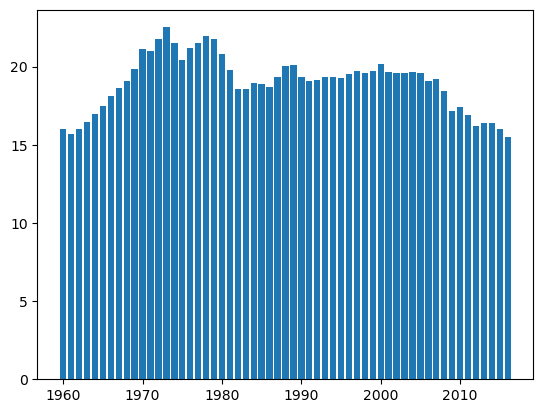

In [11]:
# get the years
years = stage['Year']
# get the values 
co2 = stage['Value']

# create
plt.bar(stage['Year'],stage['Value'])
plt.show()

Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

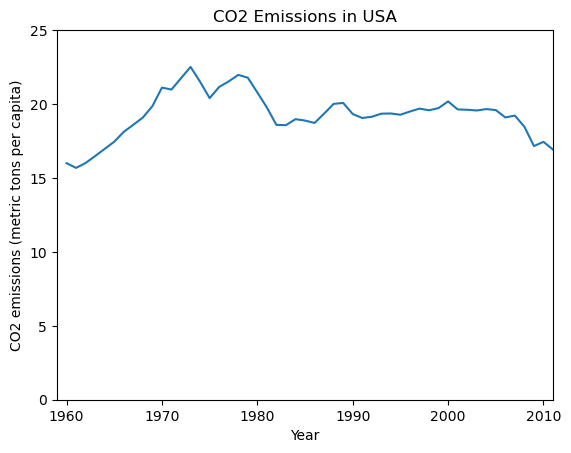

In [14]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start the y axis at 0
plt.axis([1959, 2011,0,25])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

In [15]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [16]:
print(len(hist_data))

57


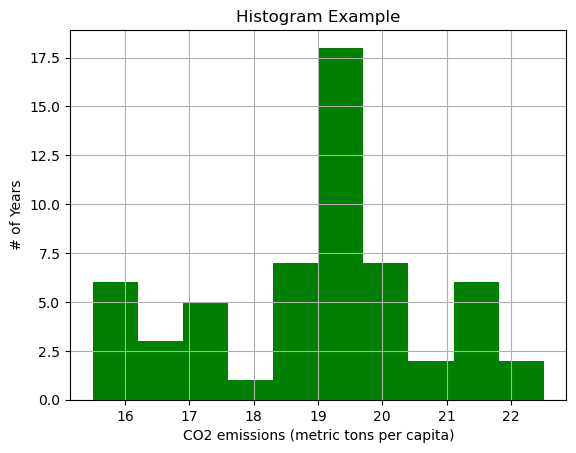

In [17]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries?

In [18]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5855504,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.572407
5856187,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.104855
5856839,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.882900
5857537,Early-demographic dividend,EAR,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,2.174205
5858274,East Asia & Pacific,EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.134880


For how many countries do we have CO2 per capita emissions data in 2011

In [19]:
print(len(co2_2011))

250


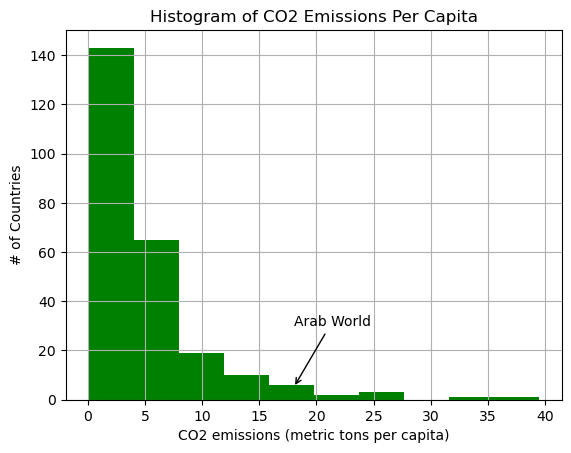

In [22]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("Arab World",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GPD and CO2 Emissions in USA

In [23]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2010'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [24]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36289,United States,USA,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1960,17562.592084
78229,United States,USA,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1961,17671.150187


In [45]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36242,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
78181,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


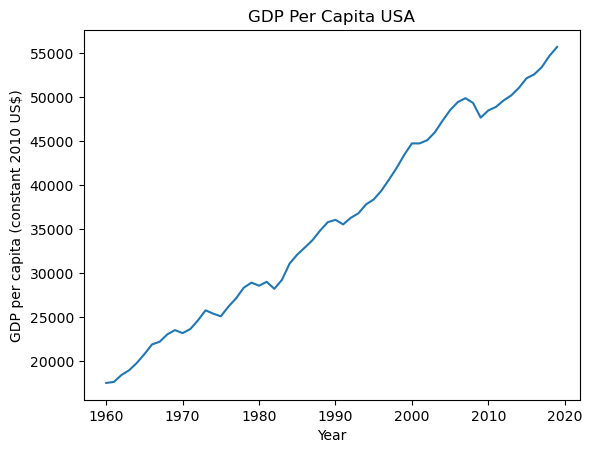

In [25]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [47]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2019
CO2 Min Year =  1960 max:  2016


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [27]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2017]
print(len(gdp_stage_trunc))
print(len(stage))

57
57


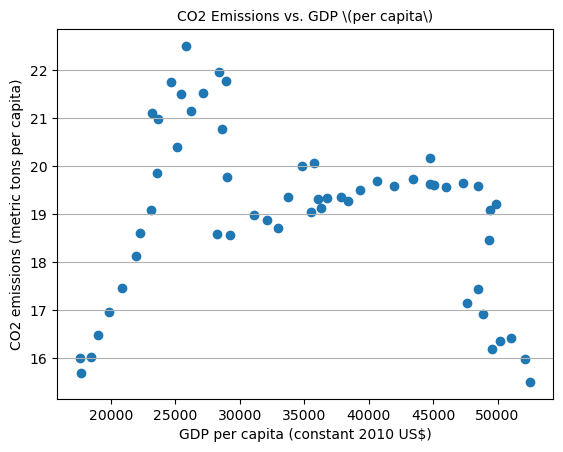

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [50]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[ 1.        , -0.20456087],
       [-0.20456087,  1.        ]])

In Matplotlib, `fig` and `ax` are commonly used variable names that refer to the figure and axes objects, respectively.

- **Figure (`fig`)**: It represents the entire figure or window where one or more plots or visual elements can be created. It's the top-level container for all elements in the plot. You can think of it as a canvas where you'll place your visualizations.

- **Axes (`ax`)**: Axes are the actual plots within the figure. They can be thought of as an individual plot or graph (like a bar plot, line plot, scatter plot, etc.). An important distinction is that an Axes object can contain multiple plots (subplots) arranged in a grid.

When creating a plot using Matplotlib, you typically create a `fig` and one or more `ax` objects. For example:

```python
import matplotlib.pyplot as plt

# Creating a figure and axes objects
fig, ax = plt.subplots()

# Plotting on the axes
ax.plot(x_data, y_data)  # Replace x_data and y_data with your data

# Customizing the plot (adding titles, labels, etc.)
ax.set_title('My Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Displaying the plot
plt.show()
```

Here, `plt.subplots()` creates both the figure (`fig`) and axes (`ax`) objects. Then, operations and plot functions are performed on the `ax` object, including plotting data, setting titles, labels, and other customizations. Finally, `plt.show()` displays the plot contained within the `fig`.

Using `fig` and `ax` separately allows for more fine-grained control over multiple plots within the same figure, such as creating subplots or adjusting properties of individual plots in complex visualizations.

A correlation of 0.07 is pretty weak, but you'll learn more about correlation later.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;